 Movies - Cristel Irwin

Objective of the Proposed Research: This project is to help Steven Spielberg understand the characteristics of the movies in the last 30 years, for an informed decision regarding the genre, director, and any additional information that would be of value. The report will first return information about the dataset being used through data exploration. This portion will tell the director information such as the names of columns, display the first few rows of the dataset, describe the variables types the dataset contains, etc.

The report will then subset new data set from the main one. It will show the information of a popular actor that could be cosidered for a role in the next Spielberg movie. The second subset dataset will return the top 10 actors in the highest grossing movies. The next subset data will return the names of the highest grossing movies. The fourth dataset will return the top 10 highest voted movies, whle the fifth will return the movies with the highest scores.

The final portion of the data set will provide visualizations for the data. A heatmap wiil check to see what factors affect a movies score the most. Another graph will check for correlations between ratings and budget. A strip plot will show which movie rating grosses the highest amount of revenue. Regression graphs will compare gross and budget in 1980 and 2020 to see if there cwas an increase or decrease in correlation. A bar plot will show the highest grossing genre.

In [118]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.cluster import KMeans
 
    
import pandas as pd
import numpy as np
from pandas import DataFrame

In [119]:
Movies_df = pd.read_csv("C:/Users/Sandy/Desktop/R CSV FILES/movies.csv")


Data Exploration:
.head(), .info(), .shape, .columns

In [120]:
Movies_df.dropna(inplace = True)
Movies_df.isnull().sum()
Movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [121]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [122]:
print("The shape of the df is: ", Movies_df.shape)
print("The names of the columns are: " , Movies_df.columns)

The shape of the df is:  (5421, 15)
The names of the columns are:  Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


In [127]:
Movies_df['votes'].astype('int')
Movies_df['score'].astype('int')
Movies_df['budget'].astype('int')
Movies_df['gross'].astype('int')
Movies_df['runtime'].astype('int')

0       146
1       104
2       124
3        88
4        98
       ... 
7648    124
7649     99
7650    101
7651    100
7652    149
Name: runtime, Length: 5421, dtype: int32

Code to create a new column and assign numeric values to the previous ones. But I did not end up using this column.

In [130]:
Movies_df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [148]:
Movies_df['genre2'] = Movies_df['genre']
Movies_df['genre2'] = Movies_df['genre2'].replace(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography','Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi','Romance', 'Thriller', 'Mystery'],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

In [150]:
print(Movies_df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'genre2'],
      dtype='object')


Subsets of Data:

In [356]:
#Subset 1: Leonardo DiCaprio dataframe

Actor_subs = Movies_df[Movies_df.star.notnull()][Movies_df.star.dropna().str.contains("Leonardo DiCaprio")]
Actor_subs.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre2
2666,The Basketball Diaries,R,Biography,1995,"April 21, 1995 (United States)",7.3,105000.0,Scott Kalvert,Jim Carroll,Leonardo DiCaprio,United States,2000000.0,2.402438e+06,New Line Cinema,102.0,6
2755,Total Eclipse,R,Biography,1995,"November 3, 1995 (United States)",6.5,14000.0,Agnieszka Holland,Christopher Hampton,Leonardo DiCaprio,United Kingdom,8000000.0,3.401390e+05,FIT Productions,111.0,6
2845,Romeo + Juliet,PG-13,Drama,1996,"November 1, 1996 (United States)",6.7,216000.0,Baz Luhrmann,William Shakespeare,Leonardo DiCaprio,United States,14500000.0,1.475550e+08,Bazmark Films,120.0,1
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1
3283,The Man in the Iron Mask,PG-13,Action,1998,"March 13, 1998 (United States)",6.5,160000.0,Randall Wallace,Alexandre Dumas,Leonardo DiCaprio,France,35000000.0,1.829689e+08,United Artists,132.0,3
3661,The Beach,R,Adventure,2000,"February 11, 2000 (United States)",6.7,228000.0,Danny Boyle,John Hodge,Leonardo DiCaprio,United States,50000000.0,1.440569e+08,Figment Films,119.0,2
4051,Catch Me If You Can,PG-13,Biography,2002,"December 25, 2002 (United States)",8.1,866000.0,Steven Spielberg,Jeff Nathanson,Leonardo DiCaprio,United States,52000000.0,3.521143e+08,Dreamworks Pictures,141.0,6
4065,Gangs of New York,R,Crime,2002,"December 20, 2002 (United States)",7.5,415000.0,Martin Scorsese,Jay Cocks,Leonardo DiCaprio,United States,100000000.0,1.937725e+08,Miramax,167.0,7
4458,The Aviator,PG-13,Biography,2004,"December 25, 2004 (United States)",7.5,342000.0,Martin Scorsese,John Logan,Leonardo DiCaprio,United States,110000000.0,2.137199e+08,Forward Pass,170.0,6
4843,The Departed,R,Crime,2006,"October 6, 2006 (United States)",8.5,1200000.0,Martin Scorsese,William Monahan,Leonardo DiCaprio,United States,90000000.0,2.914654e+08,Warner Bros.,151.0,7


In [353]:
#Subset 2: Higest Scoring Movie

Highest_Score = Movies_df.nlargest(10, ['score'])
Highest_Score.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre2
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0,1
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0,3
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0,6
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0,7
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0,3


In [352]:
#Subset 3: Highest "Voted" movie

Most_votes = Movies_df.nlargest(10, ['votes'])
Most_votes.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre2
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0,1
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0,3
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,8.368370e+08,Warner Bros.,148.0,3
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0,7
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0,1


In [351]:
#Subset 4: Highest Grossing Movie

Score_gross = Movies_df[['name','score','gross', 'year']]
sort_df = Score_gross.sort_values(["gross"], ascending=False)
print(sort_df[:10])


                                            name  score         gross  year
5445                                      Avatar    7.8  2.847246e+09  2009
7445                           Avengers: Endgame    8.4  2.797501e+09  2019
3045                                     Titanic    7.8  2.201647e+09  1997
6663  Star Wars: Episode VII - The Force Awakens    7.8  2.069522e+09  2015
7244                      Avengers: Infinity War    8.4  2.048360e+09  2018
7480                               The Lion King    6.9  1.670728e+09  2019
6653                              Jurassic World    7.0  1.670516e+09  2015
6043                                The Avengers    8.0  1.518816e+09  2012
6646                                   Furious 7    7.1  1.515341e+09  2015
7494                                   Frozen II    6.8  1.450027e+09  2019


In [137]:
#Subset 5: Lead Actors in highest grossing movie

Score_gross = Movies_df[['star','name','gross','genre2']]
sort_df2 = Score_gross.sort_values(["gross"], ascending=False)
print(sort_df2[:10])

                   star                                        name  \
5445    Sam Worthington                                      Avatar   
7445  Robert Downey Jr.                           Avengers: Endgame   
3045  Leonardo DiCaprio                                     Titanic   
6663       Daisy Ridley  Star Wars: Episode VII - The Force Awakens   
7244  Robert Downey Jr.                      Avengers: Infinity War   
7480      Donald Glover                               The Lion King   
6653        Chris Pratt                              Jurassic World   
6043  Robert Downey Jr.                                The Avengers   
6646         Vin Diesel                                   Furious 7   
7494       Kristen Bell                                   Frozen II   

             gross genre2  
5445  2.847246e+09      3  
7445  2.797501e+09      3  
3045  2.201647e+09      1  
6663  2.069522e+09      3  
7244  2.048360e+09      3  
7480  1.670728e+09      9  
6653  1.670516e+09    

Visualization

The heatmap checks to see what factors affect a movies score the most. Surprisingly, the runtime of a movie has the largest impact on the score, followed by the gross revenue. 

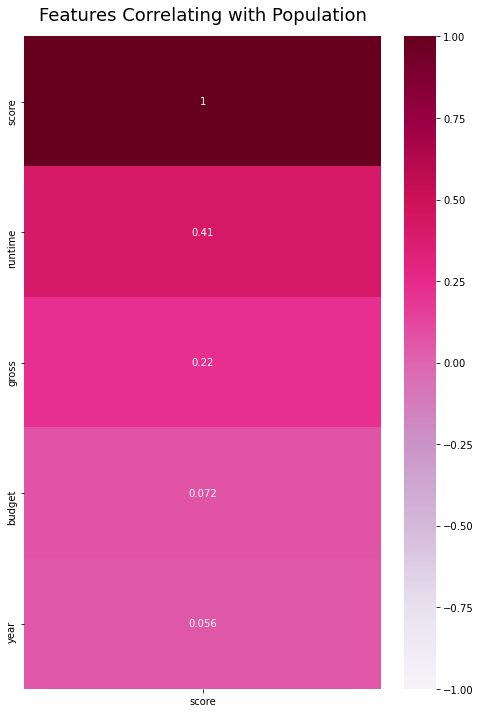

In [162]:
df_2 = Movies_df[['year','score','budget', 'gross','runtime']]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_2.corr()[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuRd')
heatmap.set_title('Features Correlating with Population', fontdict={'fontsize':18}, pad=16);

Code to create a new dataset to plot

In [200]:
new_dat4 = Movies_df.query('year == 2020')
new3 = new_dat4[['year','score','budget', 'genre2','country', 'director','name','gross']]
df_2020 = new3.sort_values(["score"], ascending=False)
m1 = df_2020.head(10)
m1

,year,score,budget,genre2,country,director,name,gross
7643,2020,7.4,205000000.0,3,United States,Christopher Nolan,Tenet,363656624.0
7646,2020,7.1,7000000.0,1,Canada,Leigh Whannell,The Invisible Man,143151000.0
7651,2020,6.8,135000000.0,2,Canada,Chris Sanders,The Call of the Wild,111105497.0
7652,2020,6.8,80000000.0,3,China,Hu Guan,The Eight Hundred,461421559.0
7648,2020,6.6,90000000.0,3,United States,Adil El Arbi,Bad Boys for Life,426505244.0
7649,2020,6.5,85000000.0,3,United States,Jeff Fowler,Sonic the Hedgehog,319715683.0
7645,2020,6.1,84500000.0,3,United States,Cathy Yan,Birds of Prey,201858461.0
7650,2020,5.6,175000000.0,2,United States,Stephen Gaghan,Dolittle,245487753.0


I used my new dataset m3, to check for correlations between ratings and budget. There didn't seem to be any. We can see that the each movie had approximately similar budgets. The movie "Tenet" had a high score as well as a the highest budget. However, the movie "Invisible Man" had a similar budget but a much lower score.

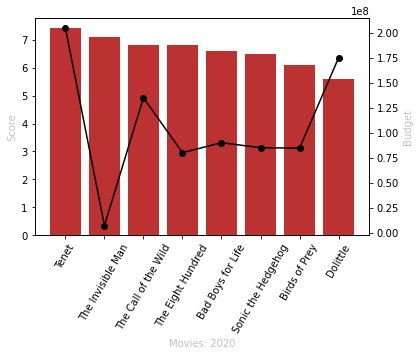

In [201]:
x = m1['name']
y = m1['score']
y1 = m1['budget']

fig, ax1 = plt.subplots()

plt.xticks(rotation=60)##Rotates titles
ax2 = ax1.twinx()
ax1.bar(x, y, color='#BC3232')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Movies: 2020', color='#C2C2C2')
ax1.set_ylabel('Score', color='#C2C2C2')
ax2.set_ylabel('Budget', color='#C2C2C2')

plt.show()

The strip plot shows us which movie rating grosses the highest amount of revenue. Movies with ratings PG-13 generate more revenue, while PG comes in second. Surprisingly, movies that are rated R and G are almost even.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'NC-17'),
  Text(4, 0, 'Approved'),
  Text(5, 0, 'Not Rated'),
  Text(6, 0, 'PG-13'),
  Text(7, 0, 'Unrated'),
  Text(8, 0, 'X'),
  Text(9, 0, 'TV-MA')])

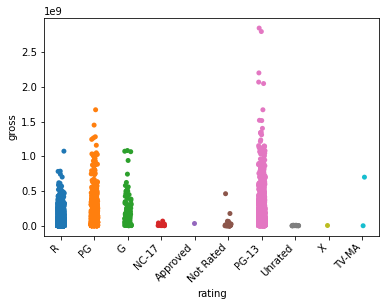

In [202]:
sns.stripplot(x="rating", y="gross", data = Movies_df)
plt.xticks(rotation = 45, ha = 'right')


In [203]:
new_dat5 = Movies_df.query('year == 1980')
new4 = new_dat5[['year','score','budget', 'genre2','country', 'director','name','gross']]
df_1980 = new4.sort_values(["score"], ascending=False)
m2 = df_1980.head(10)
m2



,year,score,budget,genre2,country,director,name,gross
2,1980,8.7,18000000.0,3,United States,Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back,538375067.0
0,1980,8.4,19000000.0,1,United Kingdom,Stanley Kubrick,The Shining,46998772.0
7,1980,8.2,18000000.0,6,United States,Martin Scorsese,Raging Bull,23402427.0
6,1980,7.9,27000000.0,3,United States,John Landis,The Blues Brothers,115229890.0
3,1980,7.7,3500000.0,4,United States,Jim Abrahams,Airplane!,83453539.0
13,1980,7.7,6000000.0,1,United States,Robert Redford,Ordinary People,54766923.0
50,1980,7.3,10000000.0,4,United States,Woody Allen,Stardust Memories,10389003.0
4,1980,7.3,6000000.0,4,United States,Harold Ramis,Caddyshack,39846344.0
11,1980,7.3,5000000.0,2,South Africa,Jamie Uys,The Gods Must Be Crazy,30031783.0
15,1980,7.2,5100000.0,1,United States,Jeannot Szwarc,Somewhere in Time,9709597.0


From the dataset, I observed that movies budgets have increased substantially over the past four decades. I wanted to compare gross and budget to see if the correlation increased or decreased from 1980 to 2020.There was a higher correlation between a movie's budget and gross revenue in 1980 than 2020.

<AxesSubplot:xlabel='budget', ylabel='gross'>

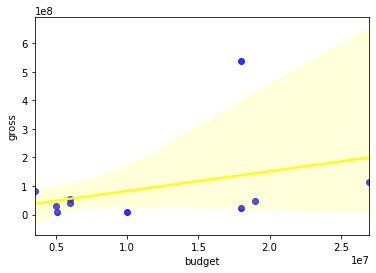

In [207]:
sns.regplot(x='budget', y='gross', data=m2, scatter_kws={'color': 'blue'}, line_kws = {'color': 'yellow'})

<AxesSubplot:xlabel='budget', ylabel='gross'>

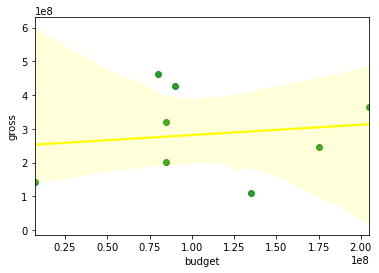

In [205]:
sns.regplot(x='budget', y='gross', data=m1, scatter_kws={'color': 'green'}, line_kws = {'color': 'yellow'})

The code below creates a new dataframe from the genres of movies. It then sums the gross of each genre from 1980 to 2020.

In [315]:
new_dat6 = Movies_df.query('genre == "Drama"')
new6 = new_dat6[['genre', 'gross']]
df_Drama = new6.sort_values(["gross"], ascending=False)
m3 = df_Drama['gross'].sum()

new_dat7 = Movies_df.query('genre == "Comedy"')
new7 = new_dat7[['genre', 'gross']]
df_Comedy = new7.sort_values(["gross"], ascending=False)
m4 = df_Comedy['gross'].sum()

new_dat8 = Movies_df.query('genre == "Action"')
new8 = new_dat8[['genre', 'gross']]
df_Action = new8.sort_values(["gross"], ascending=False)
m5 = df_Action['gross'].sum()

new_dat8 = Movies_df.query('genre == "Crime"')
new8 = new_dat8[['genre','gross']]
df_Crime = new8.sort_values(["gross"], ascending=False)
m6 = df_Crime['gross'].sum()

new_dat9 = Movies_df.query('genre == "Horror"')
new9 = new_dat9[['genre','gross']]
df_Horror = new9.sort_values(["gross"], ascending=False)
m6 = df_Horror['gross'].sum()

new_dat10 = Movies_df.query('genre == "Biography"')
new10 = new_dat10[['genre','gross']]
df_Bio = new10.sort_values(["gross"], ascending=False)
m8 = df_Bio['gross'].sum()

new_Adventure = Movies_df.query('genre == "Adventure"')
new11 = new_Adventure[['genre','gross']]
df_Adventure = new11.sort_values(["gross"], ascending=False)
m9 = df_Adventure['gross'].sum()

new_Fantasy = Movies_df.query('genre == "Fantasy"')
new12 = new_Fantasy[['genre','gross']]
df_Fantasy = new12.sort_values(["gross"], ascending=False)
m10 = df_Fantasy['gross'].sum()

new_Ani = Movies_df.query('genre == "Animation"')
new13 = new_Ani[['genre','gross']]
df_Ani = new13.sort_values(["gross"], ascending=False)
m11 = df_Ani['gross'].sum()

new_Fam = Movies_df.query('genre == "Family"')
new14 = new_Fam[['genre','gross']]
df_Fam = new14.sort_values(["gross"], ascending=False)
m12 = df_Fam['gross'].sum()

new_Western = Movies_df.query('genre == "Western"')
new15 = new_Western[['genre', 'gross']]
df_Western = new15.sort_values(["gross"], ascending=False)
m13 = df_Western['gross'].sum()

new_SF = Movies_df.query('genre == "Sci-Fi"')
new16 = new_SF[['genre','gross']]
df_SF= new16.sort_values(["gross"], ascending=False)
m13 = df_SF['gross'].sum()

new_Rom = Movies_df.query('genre == "Romance"')
new17 = new_Rom[['genre','gross']]
df_Rom= new17.sort_values(["gross"], ascending=False)
m15 = df_Rom['gross'].sum()

new_Thri = Movies_df.query('genre == "Thriller"')
new18 = new_Thri[['genre','gross']]
df_Thri= new18.sort_values(["gross"], ascending=False)
m16 = df_Thri['gross'].sum()

new_Mys = Movies_df.query('genre == "Mystery"')
new19 = new_Mys[['genre','gross']]
df_Mys= new19.sort_values(["gross"], ascending=False)
m17 = df_Mys['gross'].sum()


The bar plot below shows the highest grossing genre. Action movies gross the highest revenue, followed by comedies and animated movies in second place.

<AxesSubplot:>

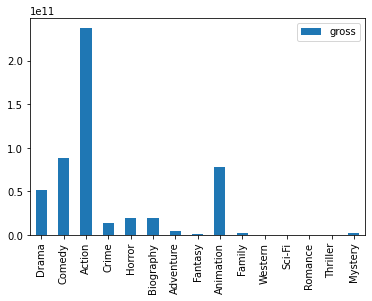

In [331]:
plotdata = pd.DataFrame(
    {"gross": [52098564769, 88514817620, 237752868767, 14261055032,19093930296,19093930296, 4357871190, 1635026609,77865909110,2074332587,225660614,167876905,167876905,297416988,2004091467]}, 
    index=['Drama', 'Comedy','Action','Crime','Horror','Biography','Adventure','Fantasy','Animation','Family','Western','Sci-Fi','Romance','Thriller','Mystery'])

plotdata.plot(kind="bar")

Practice Plots:

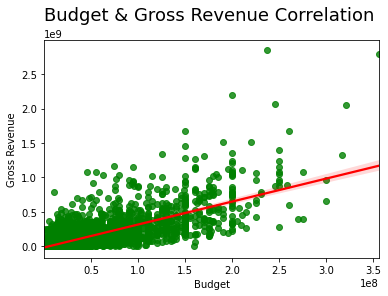

In [335]:
sns.regplot(data=Movies_df, x='budget', y='gross', color='green', line_kws={'color':'r'});
plt.title('Budget & Gross Revenue Correlation', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

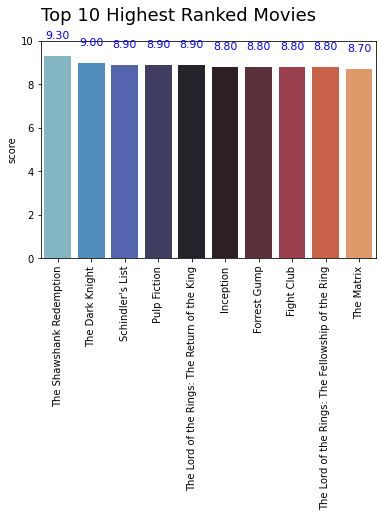

In [347]:
best_movies = Movies_df.sort_values(by='score', ascending=False).head(10)
g = sns.barplot(x='name', y='score', data=best_movies, palette='icefire');
ax = g
plt.xticks(rotation=90);
plt.xlabel('');
plt.title('Top 10 Highest Ranked Movies', loc='left', fontsize=18, pad=20);

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='blue', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0,10) 

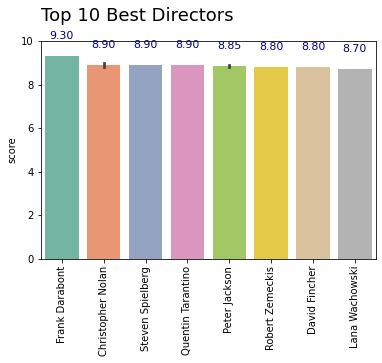

In [350]:
best_movies = Movies_df.sort_values(by='score', ascending=False).head(10)
g = sns.barplot(x='director', y='score', data=best_movies, palette='Set2');
ax = g
plt.xticks(rotation=90);
plt.xlabel('');
plt.title('Top 10 Best Directors', loc='left', fontsize=18, pad=20);

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='navy', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0,10) 

Findings:
The heatmap checks to see what factors affect a movies score the most. Surprisingly, the runtime of a movie has the largest impact on the score, followed by the gross revenue. I used my new dataset m3, to check for correlations between ratings and budget. There didn't seem to be any. We can see that the each movie had approximately similar budgets. The movie "Tenet" had a high score as well as a the highest budget. However, the movie "Invisible Man" had a similar budget but a much lower score. 

The strip plot shows us which movie rating grosses the highest amount of revenue. Movies with ratings PG-13 generate more revenue, while PG comes in second. Surprisingly, movies that are rated R and G are almost even. From the dataset, I observed that movies budgets have increased substantially over the past four decades. I wanted to compare gross and budget to see if the correlation increased or decreased from 1980 to 2020.There was a higher correlation between a movie's budget and gross revenue in 1980 than 2020. The bar plot below shows the highest grossing genre. Action movies gross the highest revenue, followed by comedies and animated movies in second place.

The adivce is to direct an action movie starring Sam Worthington in the lead role.